In [91]:
%matplotlib inline
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
points = genfromtxt("data/gradient_descent_example_data.csv", delimiter=",")

In [23]:
df = pd.DataFrame(points)

In [24]:
df.columns = ['X','y']

In [25]:
df

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
5,55.142188,78.211518
6,52.211797,79.641973
7,39.299567,59.171489
8,48.105042,75.331242
9,52.550014,71.300880


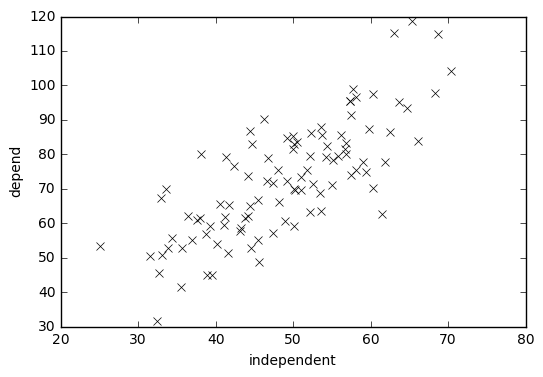

In [53]:
plt.plot(df.X, df.y, 'kx')
plt.xlabel('independent')
plt.ylabel('depend')

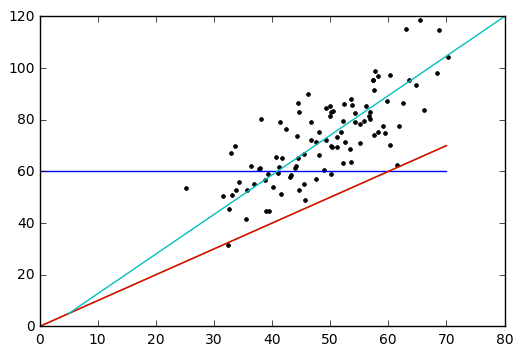

In [62]:
plt.plot(df.X, df.y, 'k.')
plt.plot([0, 70], [60,60], '-')
plt.plot([0, 70], [0,70], '-')
plt.plot([0, 70], [0,70], '-')
plt.plot([5, 80], [5,120], '-')


In [65]:
#https://www.google.co.in/search?q=rmse+error+actual+and+predicted&rlz=1C5CHFA_enIN727IN727&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjA1um577fWAhXIxLwKHTNaDCUQ_AUICigB&biw=1152&bih=626#imgrc=eOhzl5tO3VhMaM:

RMSE 
<img src="data/images/error_compute.png">

In [68]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

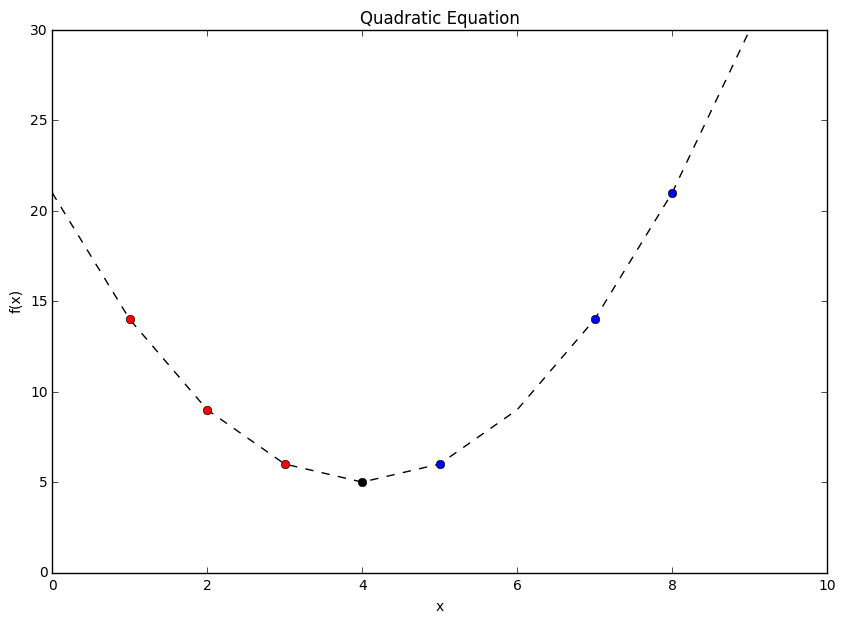

In [77]:

x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2+5 for n in x_quad]
plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4, 5, 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Equation')

Gradient Descent 
<img src="data/images/gradient_de_image.png">

In [93]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [94]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

In [95]:
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
    

In [97]:
#Starting error
compute_error_for_line_given_points(initial_b, initial_m, points)


5565.1078344832113

In [98]:
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)


In [99]:
print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))


After 1000 iterations b = 0.0889365199374, m = 1.47774408519, error = 112.614810116


In [100]:
from IPython.display import HTML
HTML('<img src="data/images/gradient_descent_example.gif">')